In [1]:
#Importando as bibliotecas

import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Importando a base de dados

dados = pd.read_csv('notas_faculdade_enem.csv')

dados.head()

,Faculdade,ENEM
0,2.40,1714
1,2.52,1664
2,2.54,1760
3,2.74,1685
4,2.83,1693


In [2]:
dados.describe()

,Faculdade,ENEM
count,84.000000,84.000000
mean,3.330238,1845.273810
std,0.271617,104.530661
min,2.400000,1634.000000
25%,3.190000,1772.000000
50%,3.380000,1846.000000
75%,3.502500,1934.000000
max,3.810000,2050.000000


In [3]:
y = dados['Faculdade']

In [4]:
x1 = dados['ENEM']

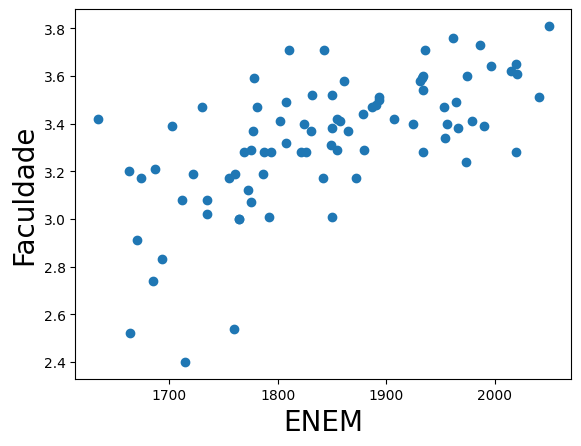

In [5]:
plt.scatter (x1,y)
plt.xlabel('ENEM', fontsize = 20)
plt.ylabel('Faculdade', fontsize = 20)
plt.show()

In [6]:
# 
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Faculdade   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           7.20e-11
Time:                        17:57:19   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
ENEM           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

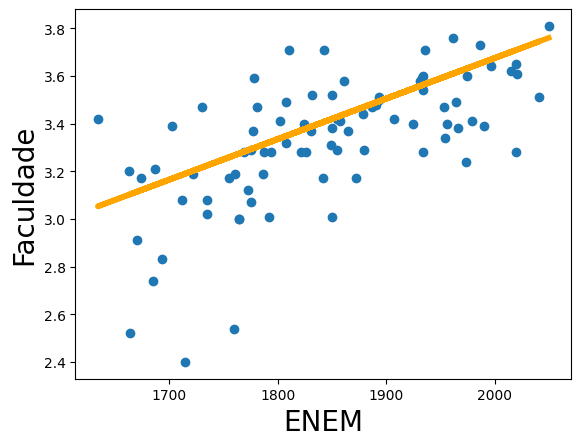

In [7]:
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.2750
fig = plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'Linha de regressão')
plt.xlabel('ENEM', fontsize = 20)
plt.ylabel('Faculdade', fontsize = 20)
plt.show()

In [8]:
#Exibindo o erro padrão e os coeficientes com todas as casas decimais

stderr = results.bse
params = results.params

decimal_places = 8

print(f"{'Parâmetros':<10} {'Coeficientes (Beta)':<15} {'Erro-padrão':<15}")
for i in range(len(params)):
    print(f"{results.model.exog_names[i]:<10} "
          f"{params[i]:<15.{decimal_places}f} "
          f"{stderr[i]:<15.{decimal_places}f} ")

Parâmetros Coeficientes (Beta) Erro-padrão    
const      0.27504030      0.40873942      
ENEM       0.00165569      0.00022116      


C:\Users\wagner.berna\AppData\Local\Temp\ipykernel_29148\1776375167.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{params[i]:<15.{decimal_places}f} "
C:\Users\wagner.berna\AppData\Local\Temp\ipykernel_29148\1776375167.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{stderr[i]:<15.{decimal_places}f} ")


In [10]:
#Forma alternativa de exibir os resultados da regressão

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Faculdade   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           7.20e-11
Time:                        18:00:17   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.5